Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.2/9

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Using device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

Components loaded
Generating image...


Diffusion steps...:   0%|          | 0/30 [00:00<?, ?it/s]

Saved intermediate image: outputs_sd/step_00.png
Saved intermediate image: outputs_sd/step_05.png
Saved intermediate image: outputs_sd/step_10.png
Saved intermediate image: outputs_sd/step_15.png
Saved intermediate image: outputs_sd/step_20.png
Saved intermediate image: outputs_sd/step_25.png
Saved intermediate image: outputs_sd/step_29.png

 Final image saved at: outputs_sd/final.png


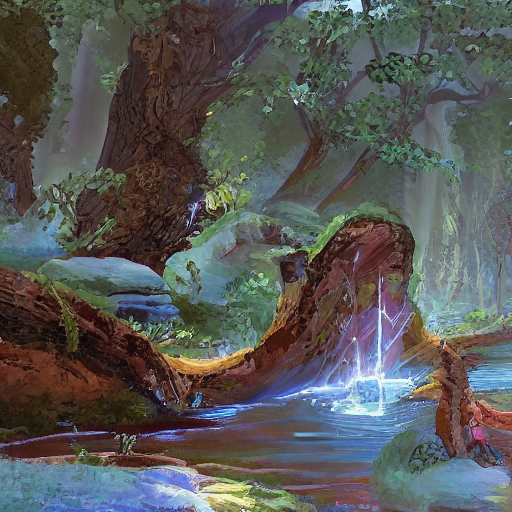

In [1]:
!pip install torch==2.7.1 torchvision==0.22.1 torchaudio==2.7.1 --index-url https://download.pytorch.org/whl/cu118
!pip install diffusers==0.30.0 transformers==4.44.2 accelerate==0.34.2 safetensors tqdm --upgrade --quiet

import torch
from diffusers import AutoencoderKL, UNet2DConditionModel, DDIMScheduler
from transformers import CLIPTextModel, CLIPTokenizer
from PIL import Image
from IPython.display import display
from tqdm.auto import tqdm
import os

# Environment setup
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load individual components
model_id = "runwayml/stable-diffusion-v1-5"

tokenizer = CLIPTokenizer.from_pretrained(model_id, subfolder="tokenizer")

text_encoder = CLIPTextModel.from_pretrained(
    model_id, subfolder="text_encoder", torch_dtype=torch.float16
).to(device)

vae = AutoencoderKL.from_pretrained(model_id, subfolder="vae")

unet = UNet2DConditionModel.from_pretrained(
    model_id, subfolder="unet", torch_dtype=torch.float16
).to(device)

scheduler = DDIMScheduler.from_pretrained(model_id, subfolder="scheduler")

print("Components loaded")

# Tokenize prompt
prompt = "a fantasy landscape with waterfalls and glowing trees, cinematic lighting"

text_inputs = tokenizer(
    prompt,
    padding="max_length",
    max_length=tokenizer.model_max_length,
    truncation=True,
    return_tensors="pt",
)

text_embeddings = text_encoder(text_inputs.input_ids.to(device))[0]

# Create initial noise
latents = torch.randn((1, unet.config.in_channels, 64, 64), device=device, dtype=torch.float16)

# Reverse diffusion process
os.makedirs("outputs_sd", exist_ok=True)
scheduler.set_timesteps(30)

print("Generating image...")

with torch.inference_mode():
    for i, t in enumerate(tqdm(scheduler.timesteps, desc="Diffusion steps...")):
        noise_pred = unet(latents, t, encoder_hidden_states=text_embeddings).sample
        latents = scheduler.step(noise_pred, t, latents).prev_sample

        # Save image every 5 steps or at the end
        if i % 5 == 0 or i == len(scheduler.timesteps) - 1:
            vae = vae.to(device, dtype=torch.float16)
            img = vae.decode(1 / 0.18215 * latents).sample
            vae = vae.to("cpu")

            img = (img / 2 + 0.5).clamp(0, 1)
            img = img.cpu().permute(0, 2, 3, 1).numpy()[0]
            img = Image.fromarray((img * 255).astype("uint8"))

            filename = f"outputs_sd/step_{i:02d}.png"
            img.save(filename)
            print(f"Saved intermediate image: {filename}")

# Free embedding memory
del text_embeddings
torch.cuda.empty_cache()

# Decode final result
vae = vae.to(device, dtype=torch.float16)
with torch.no_grad():
    image = vae.decode(1 / 0.18215 * latents).sample

vae = vae.to("cpu")
torch.cuda.empty_cache()

# Display and save final image
image = (image / 2 + 0.5).clamp(0, 1)
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).astype("uint8"))

final_path = "outputs_sd/final.png"
image.save(final_path)

print(f"\n Final image saved at: {final_path}")
display(image)
